![alt text](statements/T10.png "T11")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import special

In [20]:
X = np.random.normal(0, 1, 1000)

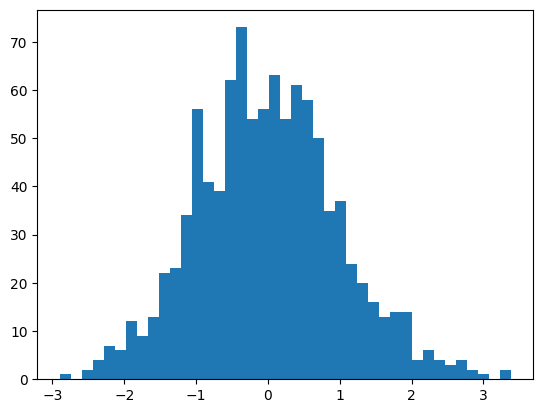

In [29]:
plt.hist(X, bins=41)
plt.show()
n = 50

### Я сам догадался, но это есть прямым текстом в учебнике)
### $D_n = \max \limits_{i = 1}^{n} max(\frac{i}{n} - F(X_{(i)}), F(X_{(i)}) - \frac{i - 1}{n})$

In [30]:
def getMaxAbs(X, dist):
    X_ord = np.sort(np.array([np.float64('-inf')] + list(X) + [np.float64('inf')]))
    n = len(X_ord) - 1
    max_abs = float('-inf')
    for i in range(1, len(X_ord)):
        cdf = dist.cdf(X_ord[i])
        max_abs = max([max_abs, abs((i - 1) / n - cdf), abs(i / n  - cdf)])
        if max_abs > 1:
            print(cdf, X_ord[i], X_ord[i - 1])
    return max_abs

In [31]:
%%time
abss = []
for n in range (1, 1000):
    dist = stats.norm
    X = dist.rvs(size=n)
    abss.append(getMaxAbs(X, dist))

CPU times: total: 32.7 s
Wall time: 35.7 s


In [32]:
abss[0:5]

[0.5,
 0.6382904767233348,
 0.42683947070149886,
 0.19999999999999996,
 0.3777717669317232]

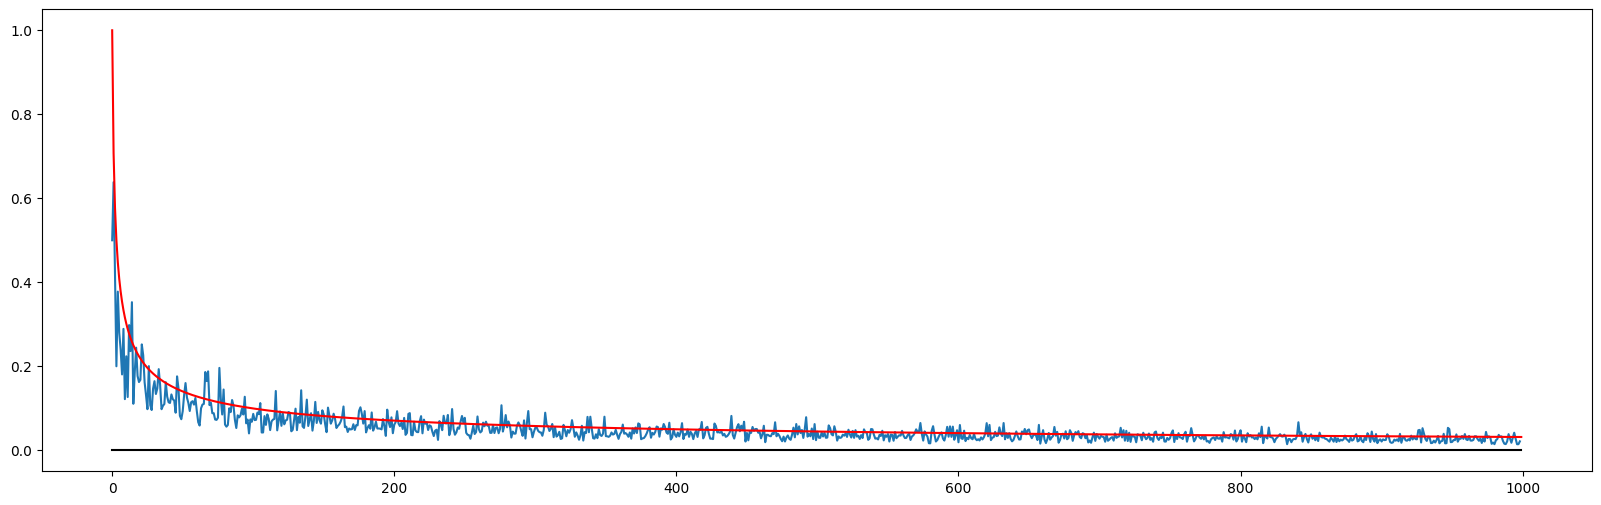

In [33]:
plt.figure(figsize=[20, 6])
plt.plot(abss)
plt.plot([0, len(abss)], [0, 0], color='black')
plt.plot(np.linspace(0, len(abss), 1000), np.sqrt(np.linspace(1, len(abss), 1000) ** -1), color='red')

In [26]:
counts = []
for x in np.linspace(-1, 10, 111):
    counts.append(0)
    for i in range(len(abss)):
        counts[-1] += abss[i] * np.sqrt(i + 1) <= x
    counts[-1] /= len(abss)

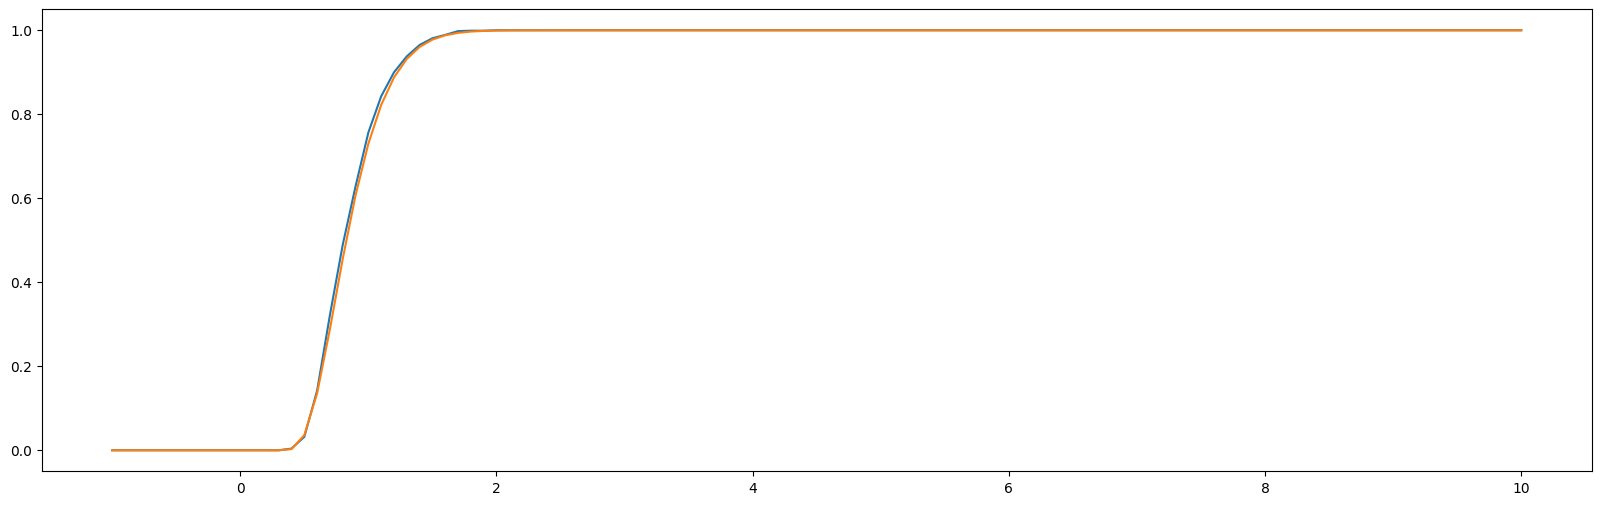

In [27]:
plt.figure(figsize=[20, 6])
plt.plot(np.linspace(-1, 10, 111), counts)
plt.plot(np.linspace(-1, 10, 111), stats.kstwobign.cdf(np.linspace(-1, 10, 111)))

### Этот график иллюстрирует справедливость теоремы Колмогорова: $\sqrt{n} D_n \rightarrow \limits^d K$, где $K$ - распределение Колмогорова

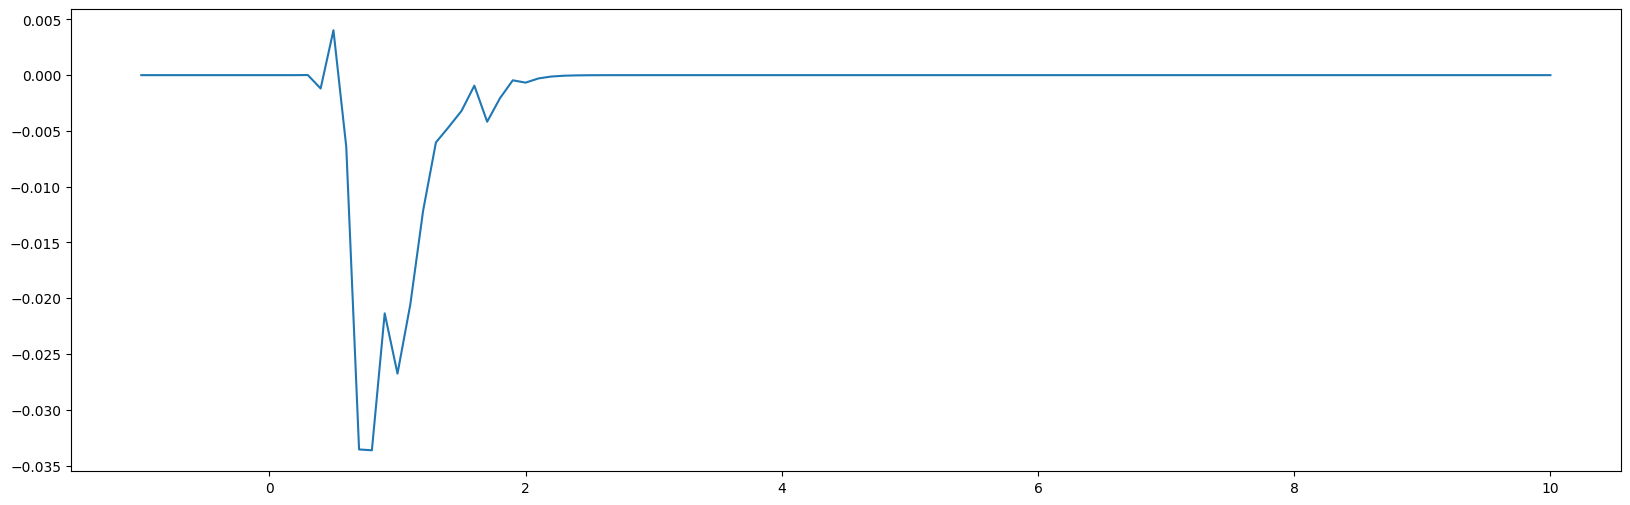

In [28]:
plt.figure(figsize=[20, 6])
plt.plot(np.linspace(-1, 10, 111), stats.kstwobign.cdf(np.linspace(-1, 10, 111)) - counts)

### По теореме Гливенко-Кантелли, $D_n \rightarrow \limits^{п.н.} 0$